In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import mridc
from utils import readcfl

In [3]:
dataset_dir = "data/"

!rm -rf $dataset_dir

url = "http://old.mridata.org/knees/fully_sampled/p1/e1/s1/P1.zip"
!wget -q $url

!unzip -q P1.zip -d $dataset_dir
!rm P1.zip

In [4]:
kspace = readcfl(os.path.join([x[0] for x in os.walk(dataset_dir)][-1], "kspace"))

In [5]:
kspace.shape

(320, 320, 256, 8)

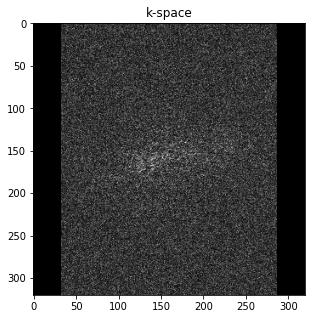

In [34]:
plt.figure(figsize=(5, 5))
plt.imshow(np.abs(kspace[:, :, 100, 0]), cmap="gray")
plt.title('k-space')
plt.show()

In [31]:
imspace = np.fft.ifftshift(np.fft.ifftn(np.fft.ifftshift(kspace, axes=(0, 1, 2)), axes=(0, 1, 2)), axes=(0, 1, 2))

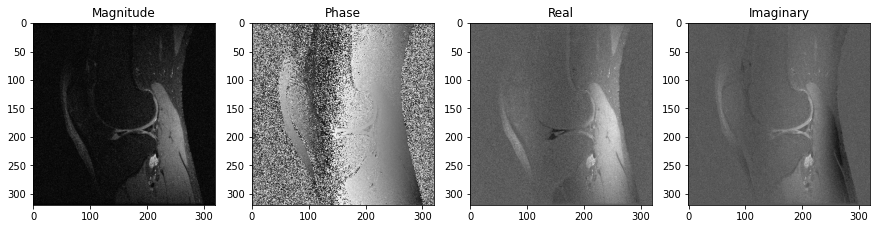

In [33]:
plt.figure(figsize=(15, 15))
plt.subplot(1, 4, 1)
plt.imshow(np.abs(imspace[:, :, 100, 0]), cmap="gray")
plt.title('Magnitude')
plt.subplot(1, 4, 2)
plt.imshow(np.angle(imspace[:, :, 100, 0]), cmap="gray")
plt.title('Phase')
plt.subplot(1, 4, 3)
plt.imshow(np.real(imspace[:, :, 100, 0]), cmap="gray")
plt.title('Real')
plt.subplot(1, 4, 4)
plt.imshow(np.imag(imspace[:, :, 100, 0]), cmap="gray")
plt.title('Imaginary')
plt.show()

In [41]:
sens = np.sqrt(np.mean(np.abs(kspace) ** 2, axis=2))
# sens = sens / np.max(sens)
# sens = sens ** 2
# sens = sens / np.sum(sens, axis=2, keepdims=True)
sens = np.transpose(np.tile(sens, (kspace.shape[2], 1, 1, 1)), (1, 2, 0, 3))

In [43]:
sens.shape

(320, 320, 256, 8)

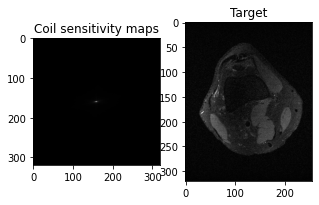

In [42]:
plt.figure(figsize=(5, 5))
plt.subplot(1, 2, 1)
plt.imshow(np.abs(sens[:, :, 50, 0]), cmap="gray")
plt.title('Coil sensitivity maps')
plt.subplot(1, 2, 2)
plt.imshow(np.abs(np.sum(imspace*sens.conj(), -1)[100]), cmap="gray")
plt.title('Target')
plt.show()